## Predicting whether or not the user will click on an ad based off the features of that user

The data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data=pd.read_csv('advertising.csv')

In [4]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

In [9]:
sns.set_style('darkgrid')


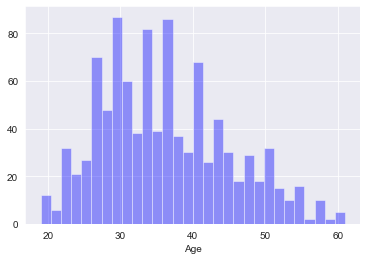

In [19]:
sns.distplot(data['Age'].dropna(),bins=30,color='blue',kde=False)

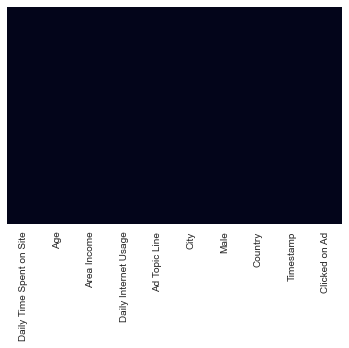

In [20]:
sns.heatmap(data.isnull(),cbar=False,yticklabels=False)


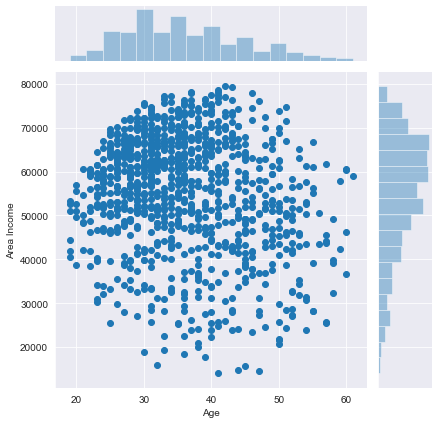

In [23]:
sns.jointplot(data['Age'],data['Area Income'],marker='o')



In [24]:
data.head(1)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.9,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0


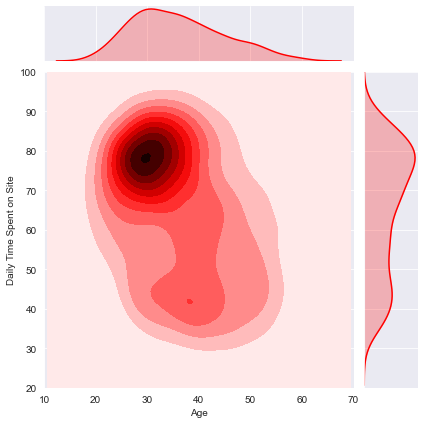

In [29]:

sns.jointplot(data['Age'],data['Daily Time Spent on Site'],color='red',kind='kde',xlim=(10,70),ylim=(20,100))

In [30]:
data.head(1)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.9,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0


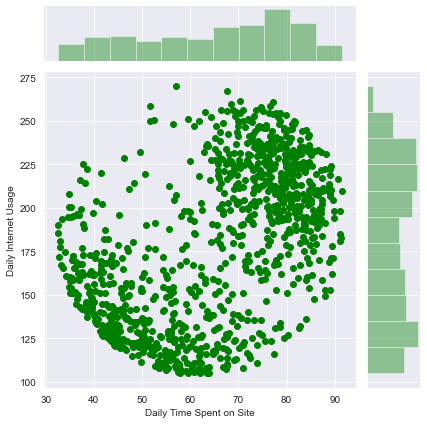

In [33]:
sns.jointplot(data['Daily Time Spent on Site'],data['Daily Internet Usage'],color='green',dropna=True,marker='o')

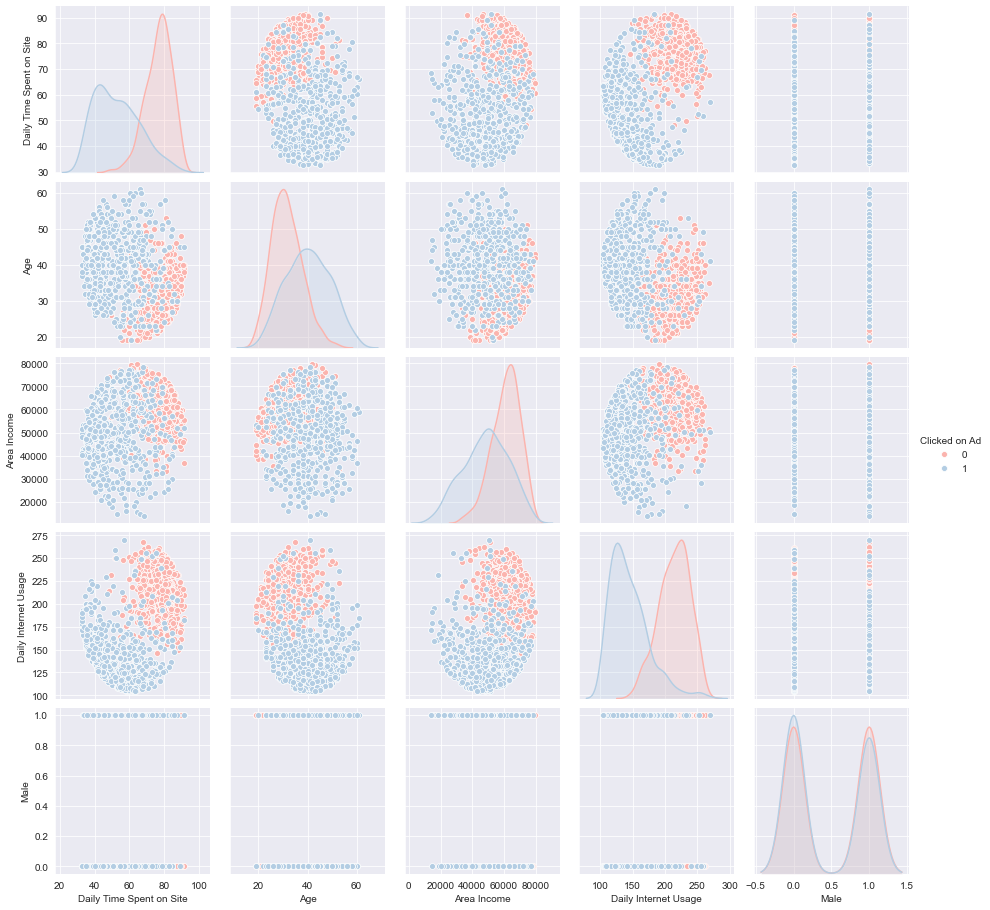

In [38]:
sns.pairplot(data,hue='Clicked on Ad',palette='Pastel1')

### 1. I will convert City, Country into numerical values (one hot encoding)
### 2. I will split the timestamp column into year,month,day and hour (from str to datetime object)

In [39]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [44]:

data.Country.astype('category').cat.codes

0      215
1      147
2      184
3      103
4       96
      ... 
995    116
996     26
997    140
998     85
999     28
Length: 1000, dtype: int16

In [45]:
data['Country'].unique()

array(['Tunisia', 'Nauru', 'San Marino', 'Italy', 'Iceland', 'Norway',
       'Myanmar', 'Australia', 'Grenada', 'Ghana', 'Qatar', 'Burundi',
       'Egypt', 'Bosnia and Herzegovina', 'Barbados', 'Spain',
       'Palestinian Territory', 'Afghanistan',
       'British Indian Ocean Territory (Chagos Archipelago)',
       'Russian Federation', 'Cameroon', 'Korea', 'Tokelau', 'Monaco',
       'Tuvalu', 'Greece', 'British Virgin Islands',
       'Bouvet Island (Bouvetoya)', 'Peru', 'Aruba', 'Maldives',
       'Senegal', 'Dominica', 'Luxembourg', 'Montenegro', 'Ukraine',
       'Saint Helena', 'Liberia', 'Turkmenistan', 'Niger', 'Sri Lanka',
       'Trinidad and Tobago', 'United Kingdom', 'Guinea-Bissau',
       'Micronesia', 'Turkey', 'Croatia', 'Israel',
       'Svalbard & Jan Mayen Islands', 'Azerbaijan', 'Iran',
       'Saint Vincent and the Grenadines', 'Bulgaria', 'Christmas Island',
       'Canada', 'Rwanda', 'Turks and Caicos Islands', 'Norfolk Island',
       'Cook Islands', 'Guatem

In [46]:
data['Country'].nunique()

237

In [47]:
data['Country Code']=data.Country.astype('category').cat.codes

In [50]:
data[data['Country Code']==115]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Country Code
223,60.94,41,76893.84,154.97,Fundamental fault-tolerant neural-net,Garciaview,0,Latvia,2016-02-14 07:30:24,1,115
404,57.24,52,46473.14,117.35,Profound optimizing utilization,Richardsonland,1,Latvia,2016-06-29 21:39:42,1,115
625,67.91,23,55002.05,146.80,Re-engineered non-volatile neural-net,Hubbardmouth,1,Latvia,2016-01-12 03:28:31,1,115
831,42.83,34,54324.73,132.38,Vision-oriented methodical support,Cunninghamhaven,1,Latvia,2016-04-23 09:42:08,1,115


In [51]:
data['City Code']=data.City.astype('category').cat.codes

In [53]:
type(data['Timestamp'][0])

str

In [54]:
data['Timestamp']=pd.to_datetime(data['Timestamp'])

In [57]:
data['Timestamp'][1].hour

1

In [58]:
data['Hour']=data['Timestamp'].apply(lambda x:x.hour)

In [59]:
data['Hour']

0       0
1       1
2      20
3       2
4       3
       ..
995    21
996     2
997    17
998     2
999    21
Name: Hour, Length: 1000, dtype: int64

In [60]:
data['Month']=data['Timestamp'].apply(lambda x:x.month)

In [61]:
data['Year']=data['Timestamp'].apply(lambda x:x.year)

In [62]:
data.head(1)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Country Code,City Code,Hour,Month,Year
0,68.95,35,61833.9,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,215,961,0,3,2016


In [64]:
x=data.drop(['Timestamp','City','Country','Ad Topic Line'],axis=1)

In [65]:
x

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Country Code,City Code,Hour,Month,Year
0,68.95,35,61833.90,256.09,0,0,215,961,0,3,2016
1,80.23,31,68441.85,193.77,1,0,147,903,1,4,2016
2,69.47,26,59785.94,236.50,0,0,184,111,20,3,2016
3,74.15,29,54806.18,245.89,1,0,103,939,2,1,2016
4,68.37,35,73889.99,225.58,0,0,96,805,3,6,2016
...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,1,116,126,21,2,2016
996,51.30,45,67782.17,134.42,1,1,26,488,2,4,2016
997,51.63,51,42415.72,120.37,1,1,140,798,17,2,2016
998,55.55,19,41920.79,187.95,0,0,85,935,2,3,2016


## Split train and test data

In [66]:
from sklearn.model_selection import train_test_split

In [76]:
xtrain,xtest,ytrain,ytest=train_test_split(x.drop('Clicked on Ad',axis=1),x['Clicked on Ad'],test_size=0.3,random_state=101)

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
lg=LogisticRegression()

In [79]:
lg.fit(xtrain,ytrain)

C:\Users\Arsalan Khan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [80]:
xtrain

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country Code,City Code,Hour,Month,Year
290,50.52,31,72270.88,171.62,0,151,350,15,1,2016
167,86.06,31,53767.12,219.72,1,210,840,18,4,2016
486,83.97,40,66291.67,158.42,1,51,912,11,2,2016
683,76.83,28,67990.84,192.81,0,59,959,14,3,2016
876,67.39,44,51257.26,107.19,0,10,318,13,1,2016
...,...,...,...,...,...,...,...,...,...,...
575,48.86,54,53188.69,134.46,0,71,628,17,1,2016
838,44.13,40,33601.84,128.48,1,52,891,20,3,2016
337,75.32,28,59998.50,233.60,1,134,353,21,1,2016
523,67.94,43,68447.17,128.16,0,143,583,0,5,2016


## Predictions and Evaluations

In [81]:
predictions = lg.predict(xtest) 

In [82]:
from sklearn.metrics import classification_report,confusion_matrix

In [83]:
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       157
           1       0.99      0.94      0.96       143

    accuracy                           0.96       300
   macro avg       0.97      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



In [84]:
print(confusion_matrix(ytest,predictions))

[[155   2]
 [  9 134]]
